In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
df_app = pd.read_csv('train.csv')
df_app.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         190       RL         90.0    15750   Pave   NaN      Reg   
1   2          60       RL         66.0    16226   Pave   NaN      IR3   
2   3          20       RL        118.0    13704   Pave   NaN      IR1   
3   4          20       RL         70.0     9800   Pave   NaN      Reg   
4   5          75       RM         87.0    18386   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN  GdWo         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      6   2006        WD         Normal     157000  
1      5   2007        WD         Normal     267000  
2      1   2006        WD         Normal     205000  
3      7   2006        WD        Abnorml     149900  
4      5   2008        WD         Normal     295000  

[5 rows x 81 columns]

In [3]:
df_app.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [4]:
df_app.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1         190       RL         90.0    15750   Pave   NaN      Reg   
1        2          60       RL         66.0    16226   Pave   NaN      IR3   
2        3          20       RL        118.0    13704   Pave   NaN      IR1   
3        4          20       RL         70.0     9800   Pave   NaN      Reg   
4        5          75       RM         87.0    18386   Pave   NaN      Reg   
5        6          20       RL         80.0    10386   Pave   NaN      Reg   
6        7          60       RL        116.0    13474   Pave   NaN      Reg   
7        8          50       RM          NaN     7920   Pave  Grvl      IR1   
8        9          30       RL          NaN    12342   Pave   NaN      IR1   
9       10          20       RL         90.0    12378   Pave   NaN      IR1   
10      11          60       RL          NaN     7685   Pave   NaN      IR1   
11      12          

In [5]:
df_app.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1160.000000  1160.000000   951.000000    1160.000000  1160.000000   
mean    580.500000    57.577586    69.698212   10529.315517     6.094828   
std     335.007463    42.294451    24.431093   10017.493921     1.401826   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     290.750000    20.000000    59.000000    7526.250000     5.000000   
50%     580.500000    50.000000    68.000000    9462.500000     6.000000   
75%     870.250000    70.000000    80.000000   11618.250000     7.000000   
max    1160.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1160.000000  1160.000000   1160.000000  1153.000000  1160.000000   
mean      5.580172  1971.023276   1984.703448    98.450997   447.211207   
std       1.127178    30.395387     20.756362   170.741427   463.425727   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   157.000000   725.000000   
max       9.000000  2010.000000   2010.000000  1378.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1160.000000  1160.000000    1160.000000  1160.000000   
mean       ...          94.094828    46.465517      22.593966     1.953448   
std        ...         124.905312    67.816930      61.465492    19.831984   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    24.000000       0.000000     0.000000   
75%        ...         168.000000    66.000000       0.000000     0.000000   
max        ...         736.000000   547.000000     386.000000   304.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1160.000000  1160.000000   1160.000000  1160.000000  1160.000000   
mean     15.300862     3.031034     49.150000     6.413793  2007.812069   
std      56.326041    42.500093    553.959843     2.675969     1.313312   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1160.000000  
mean   180756.519828  
std     80872.738245  
min     34900.000000  
25%    129975.000000  
50%    162000.000000  
75%    213310.000000  
max    755000.000000  

[8 rows x 38 columns]

In [6]:
def plot_graph(X, y, x_axis, y_axis):
    mean_x = np.mean(X)
    mean_y = np.mean(y)
    m = len(X)
    numer = 0
    denom = 0
    for i in range(m):
        numer += (X[i] - mean_x)*(y[i]-mean_y)
        denom += (X[i] - mean_x) ** 2
    b1 = numer/denom
    b0 =mean_y - (b1*mean_x)
    print('intercept & conf: ', b1, b0)
    
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100
    line_x = np.linspace(min_x, max_x, 1000)
    line_y = b0 + b1 * line_x

    plt.figure(figsize=(10,10))
    plt.ylabel(y_axis, fontsize=12)
    plt.xlabel(x_axis, fontsize=12)
    plt.plot(line_x, line_y, color='#58b970', label='Regression Line')
    plt.scatter(X, y)
    plt.title(x_axis+" vs "+y_axis)

In [7]:
#Covariance & corelation
def cov_cor(X, y):
    cov = np.cov(X, y)
    cor = np.corrcoef(X, y)
    print('covariance of x & y: ', cov[0, 1])
    print('corelation of x & y: ', cor[0, 1])

In [8]:
X_mulitple = df_app.drop(['MSZoning', 'Street', 'Alley',  'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'HeatingQC', 'BsmtQual', 'MasVnrType',  'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','LotConfig','LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], axis=1)
y_sales = df_app.SalePrice
X_mulitple = X_mulitple.fillna(0)
y_cov_arr = np.array(y_sales)


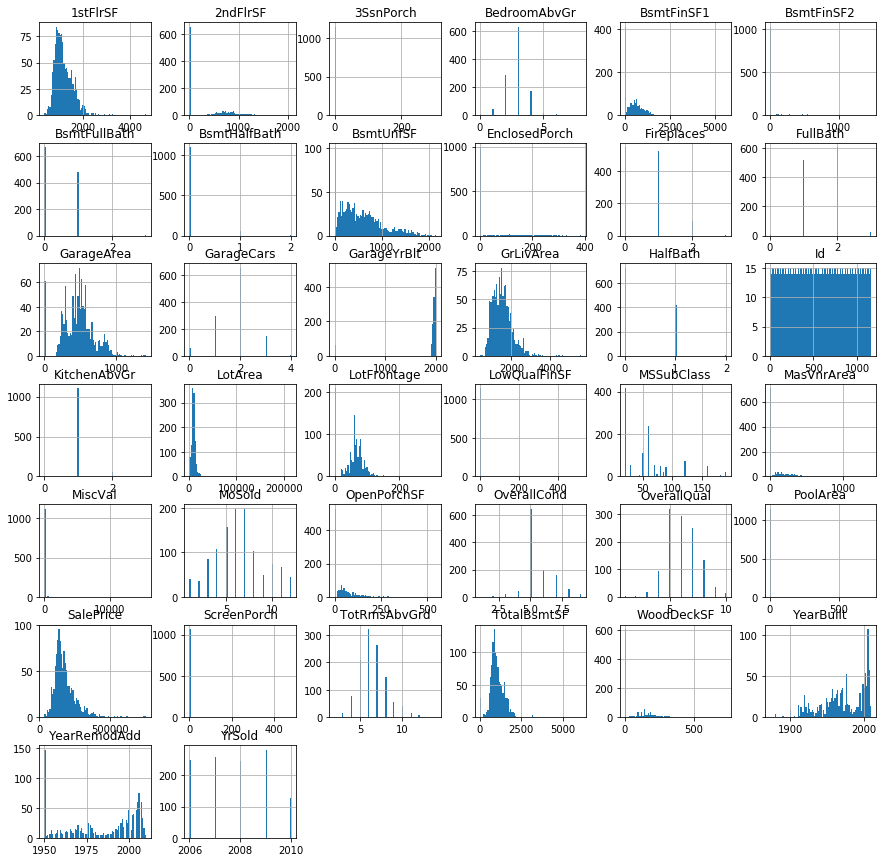

In [9]:
X_mulitple.hist(bins=80, figsize=(15,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [10]:
# correlation with Sales Price data

corr_matrix = X_mulitple.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)



SalePrice        1.000000
OverallQual      0.785860
GrLivArea        0.699584
GarageCars       0.629773
TotalBsmtSF      0.615875
1stFlrSF         0.613279
GarageArea       0.611001
FullBath         0.568083
YearBuilt        0.524433
TotRmsAbvGrd     0.524348
YearRemodAdd     0.503454
MasVnrArea       0.483880
Fireplaces       0.463771
BsmtFinSF1       0.400403
WoodDeckSF       0.331164
2ndFlrSF         0.307098
OpenPorchSF      0.296409
HalfBath         0.282331
LotArea          0.259322
GarageYrBlt      0.254134
BsmtFullBath     0.230752
BsmtUnfSF        0.206746
LotFrontage      0.201577
BedroomAbvGr     0.166532
PoolArea         0.101214
ScreenPorch      0.082721
3SsnPorch        0.074861
MoSold           0.026938
BsmtFinSF2      -0.002029
MiscVal         -0.018954
YrSold          -0.021396
BsmtHalfBath    -0.023940
Id              -0.032139
LowQualFinSF    -0.041842
OverallCond     -0.082975
MSSubClass      -0.084022
KitchenAbvGr    -0.128064
EnclosedPorch   -0.135188
Name: SalePr

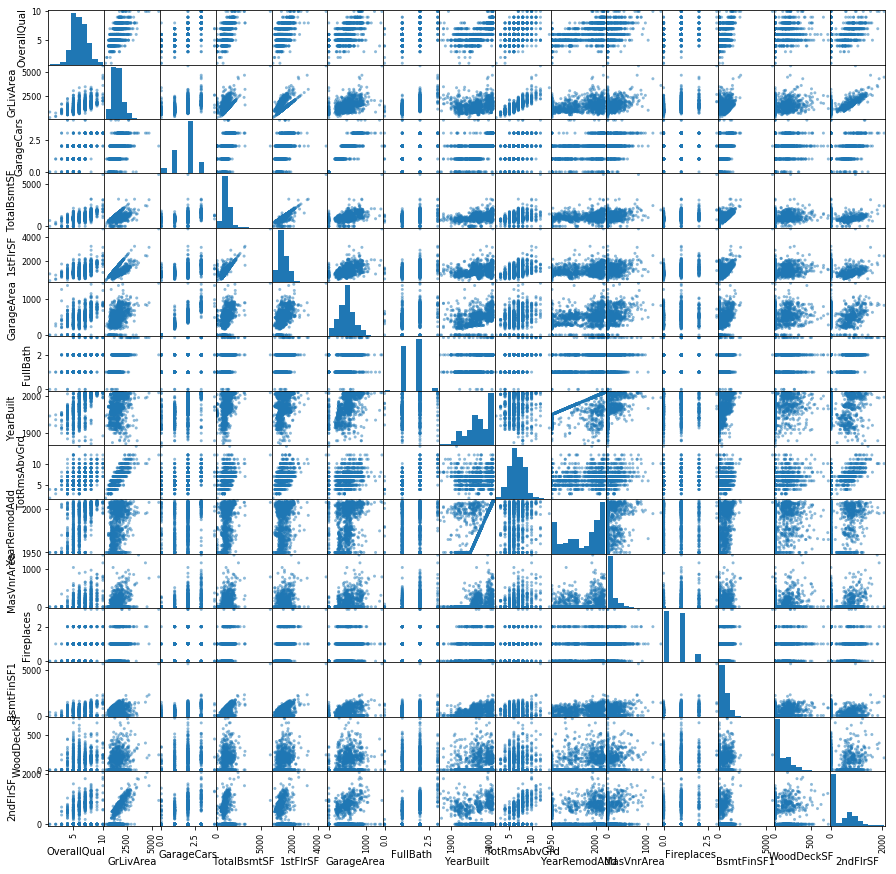

In [11]:
attributes = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','GarageArea','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd','MasVnrArea','Fireplaces','BsmtFinSF1','WoodDeckSF','2ndFlrSF']
scatter_matrix(X_mulitple[attributes], figsize=(15,15))
plt.savefig('matrix.png')

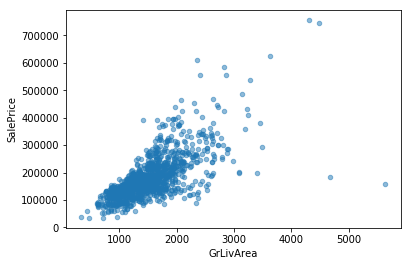

In [12]:
X_mulitple.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')

In [13]:
# Linear regression 

X_train, X_test, y_train, y_test = train_test_split(X_mulitple.drop('SalePrice',axis=1), y_sales, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# Calculate R squared
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": ',  regressor.score(X_test, y_test))

Linear Regression R squared":  0.5367964043371595


In [15]:
#Calculate root-mean-square error (RMSE)

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: ', lin_rmse)

Linear Regression RMSE:  50837.007751845034


#Calculate mean absolute error (MAE):

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: ' ,  lin_mae)

# Feature Module Selection

In [17]:
# Feature selection module
X_mulitple = X_mulitple.drop('SalePrice', axis=1)
X_mulitple.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         190         90.0    15750            5            5       1953   
1   2          60         66.0    16226            8            5       1998   
2   3          20        118.0    13704            7            5       2001   
3   4          20         70.0     9800            5            7       1972   
4   5          75         87.0    18386            7            9       1880   

   YearRemodAdd  MasVnrArea  BsmtFinSF1   ...    GarageArea  WoodDeckSF  \
0          1953        56.0         841   ...           375           0   
1          1999         0.0         281   ...           683         208   
2          2002       150.0           0   ...           843         468   
3          1972         0.0         894   ...           552         256   
4          2002         0.0           0   ...           870         302   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0            0              0          0            0         0        0   
1           50              0          0            0         0        0   
2           81              0          0            0         0        0   
3            0              0          0            0         0        0   
4            0              0          0            0         0        0   

   MoSold  YrSold  
0       6    2006  
1       5    2007  
2       1    2006  
3       7    2006  
4       5    2008  

[5 rows x 37 columns]

In [18]:
# univariate feature selection
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline

X_train_skb, X_test_skb, y_train_skb, y_test_skb = train_test_split(X_mulitple, y_sales, test_size=0.3, random_state=0)

pipeline = Pipeline([('selectkbest', SelectKBest(mutual_info_regression, k=25)), ('lr', LinearRegression())])
pipeline.fit(X_train_skb, y_train_skb)




/home/xavient/Desktop/manoj/python/globalenv/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=25,
      score_func=<function mutual_info_regression at 0x7f7c87d5a1e0>)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [19]:
y_pred_skb = pipeline.predict(X_test_skb)
print("SelectKBest feature selection response:")
print('Linear Regression R squared": ',  regressor.score(X_test_skb, y_test_skb))
#Calculate root-mean-square error (RMSE)

lin_mse_skb = mean_squared_error(y_pred_skb, y_test_skb)
lin_rmse_skb = np.sqrt(lin_mse_skb)
print('Linear Regression RMSE: ', lin_rmse_skb)

#Calculate mean absolute error (MAE):

lin_mae_skb = mean_absolute_error(y_pred_skb, y_test_skb)
print('Linear Regression MAE: ' ,  lin_mae_skb)

SelectKBest feature selection response:
Linear Regression R squared":  0.5367964043371595
Linear Regression RMSE:  48057.86525957487
Linear Regression MAE:  23363.060150393663


In [20]:
# Recursive feature elimination (RFE)

from sklearn.feature_selection import RFE

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_mulitple, y_sales, test_size=0.3, random_state=0)
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_train_rfe, y_train_rfe)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=1, step=1, verbose=0)

In [21]:
y_pred_rfe = rfe.predict(X_test_rfe)
print("RFE feature selection response:")
print('Linear Regression R squared": ',  regressor.score(X_test_rfe, y_test_rfe))
#Calculate root-mean-square error (RMSE)

lin_mse_rfe = mean_squared_error(y_pred_rfe, y_test_rfe)
lin_rmse_rfe = np.sqrt(lin_mse_rfe)
print('Linear Regression RMSE: ', lin_rmse_rfe)

#Calculate mean absolute error (MAE):

lin_mae_rfe = mean_absolute_error(y_pred_rfe, y_test_rfe)
print('Linear Regression MAE: ' ,  lin_mae_rfe)

RFE feature selection response:
Linear Regression R squared":  0.5367964043371595
Linear Regression RMSE:  48039.92472277247
Linear Regression MAE:  33834.17972849878


In [22]:
# L1-based feature selection
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_mulitple, y_sales, test_size=0.3, random_state=0)

#lasso_pipeline = Pipeline([('lasso', Lasso(alpha=0.5)), ('lr', LinearRegression())])
#lasso_pipeline.fit(X_train_l, y_train_l)
clf = Lasso(alpha=0.5)
clf.fit(X_train_l, y_train_l)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
y_pred_l = rfe.predict(X_test_l)
print("RFE feature selection response:")
print('Linear Regression R squared": ',  regressor.score(X_test_l, y_test_l))
#Calculate root-mean-square error (RMSE)

lin_mse_l = mean_squared_error(y_pred_l, y_test_l)
lin_rmse_l = np.sqrt(lin_mse_l)
print('Linear Regression RMSE: ', lin_rmse_l)

#Calculate mean absolute error (MAE):

lin_mae_l = mean_absolute_error(y_pred_l, y_test_l)
print('Linear Regression MAE: ' ,  lin_mae_l)

RFE feature selection response:
Linear Regression R squared":  0.5367964043371595
Linear Regression RMSE:  48039.92472277247
Linear Regression MAE:  33834.17972849878


# OutLiers module

In [61]:
X_mulitple.boxplot(return_type='both', figsize=[45, 45], rot=45,fontsize=35, layout=(4,1))
plt.plot()


ValueError: The 'layout' keyword is not supported when 'by' is None